In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Suppress a specific warning type
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
# Load the data
df = pd.read_json("Test/ergometer_500m.json")

df['split_time_hours'] = df['split_time'] / 3600  # Conversion du temps en heures
df['speed_kmh'] = (0.5 / df['split_time_hours'])  # La distance est de 0.5 km (500m)

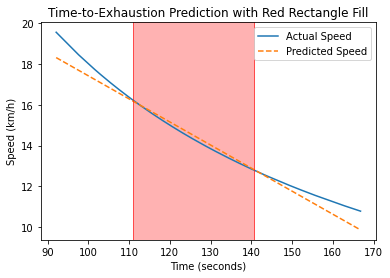

In [6]:
X = df['split_time'].values.reshape(-1, 1) 
y = df['speed_kmh'].values 

model = LinearRegression()
model.fit(X, y)

# Predict speed over time
predicted_speed = model.predict(X)

# Convert X to a 1D array
Xp = X.flatten()  # Flatten the 2D array into 1D
arg = np.argsort(Xp)  # Sort X values
Xp_sorted = Xp[arg]
y_sorted = y[arg]
predicted_speed_sorted = predicted_speed[arg]

plt.plot(Xp_sorted, y_sorted, label='Actual Speed')
plt.plot(Xp_sorted, predicted_speed_sorted, label='Predicted Speed', linestyle='--')

intersections = np.where(np.diff(np.sign(y_sorted - predicted_speed_sorted)))[0]

if len(intersections) > 1:
    x_fill_start = Xp_sorted[intersections[0]]
    x_fill_end = Xp_sorted[intersections[1]]
    
    plt.axvline(x_fill_start, color='red', linestyle='-', linewidth=0.5)
    plt.axvline(x_fill_end, color='red', linestyle='-', linewidth=0.5)

    plt.axvspan(x_fill_start, x_fill_end, color='red', alpha=0.3)

plt.title('Time-to-Exhaustion Prediction with Red Rectangle Fill')
plt.xlabel('Time (seconds)')
plt.ylabel('Speed (km/h)')
plt.legend()
plt.show()